In [1]:
# Add Matplotlib  
%matplotlib inline
# Add dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import os #(just in case)

# Load files 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [2]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
#Get Summary DataFrame 

#1 Get the toal rides for each city 
type_rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_rides_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
#2 Get the total of drivers for each city  
type_drivers_count = city_data_df.groupby(["type"]).sum()["driver_count"]
type_drivers_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
 #3 Total amount of fares
type_fares_count = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fares_count

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
 #4 Get average fare per ride. 
type_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
type_avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [8]:
#5 Get average fare per driver. 
driver_avg_fare = type_fares_count / type_drivers_count
#city_data_df.groupby(["fare"]).sum()["driver_count"] / city_data_df["driver_count"].sum() * 100 

driver_avg_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [9]:
 #6 Create a summary DataFrame. 
pyber_summary_df=pd.DataFrame(
    { "Total Rides": type_rides_count,
      "Total Drivers": type_drivers_count,
      "Total Fares": type_fares_count,
      "Average Fare per Ride": type_avg_fare,
      "Average Fare per Driver": driver_avg_fare})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#7 Remove the index name 
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#8 Format the columns
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [12]:
#A multiple-line chart
#1 Read the merged DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [34]:
 #2 Using groupby() to create a new DataFrame showing the sum of the fares 
#groupby city type and date.
type_dates_count = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
type_dates_count

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [14]:
#3 Reset the index on the DataFrame 
type_dates_count = type_dates_count.reset_index()

type_dates_count

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [15]:
# 4 Create a pivot table 
pyber_pivot_table = pd.pivot_table(type_dates_count, values='fare', index = 'date', columns ='type')

pyber_pivot_table

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [16]:
#5 Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

loc_pyber_pivottable = pyber_pivot_table.loc['2019-01-01':'2019-04-29']
loc_pyber_pivottable

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [17]:
 #6 Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

loc_pyber_pivottable.index = pd.to_datetime(loc_pyber_pivottable.index)

In [18]:
 #7 Check the datatype for the correct index is datetime  

loc_pyber_pivottable.info()
# loc_pyber_pivottable

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [19]:
 # 8. Create a new DataFrame using the "resample()" and get sums 
loc_pyber_pivottable_res=loc_pyber_pivottable.resample('W').sum()

loc_pyber_pivottable_res.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


C:\Users\willi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


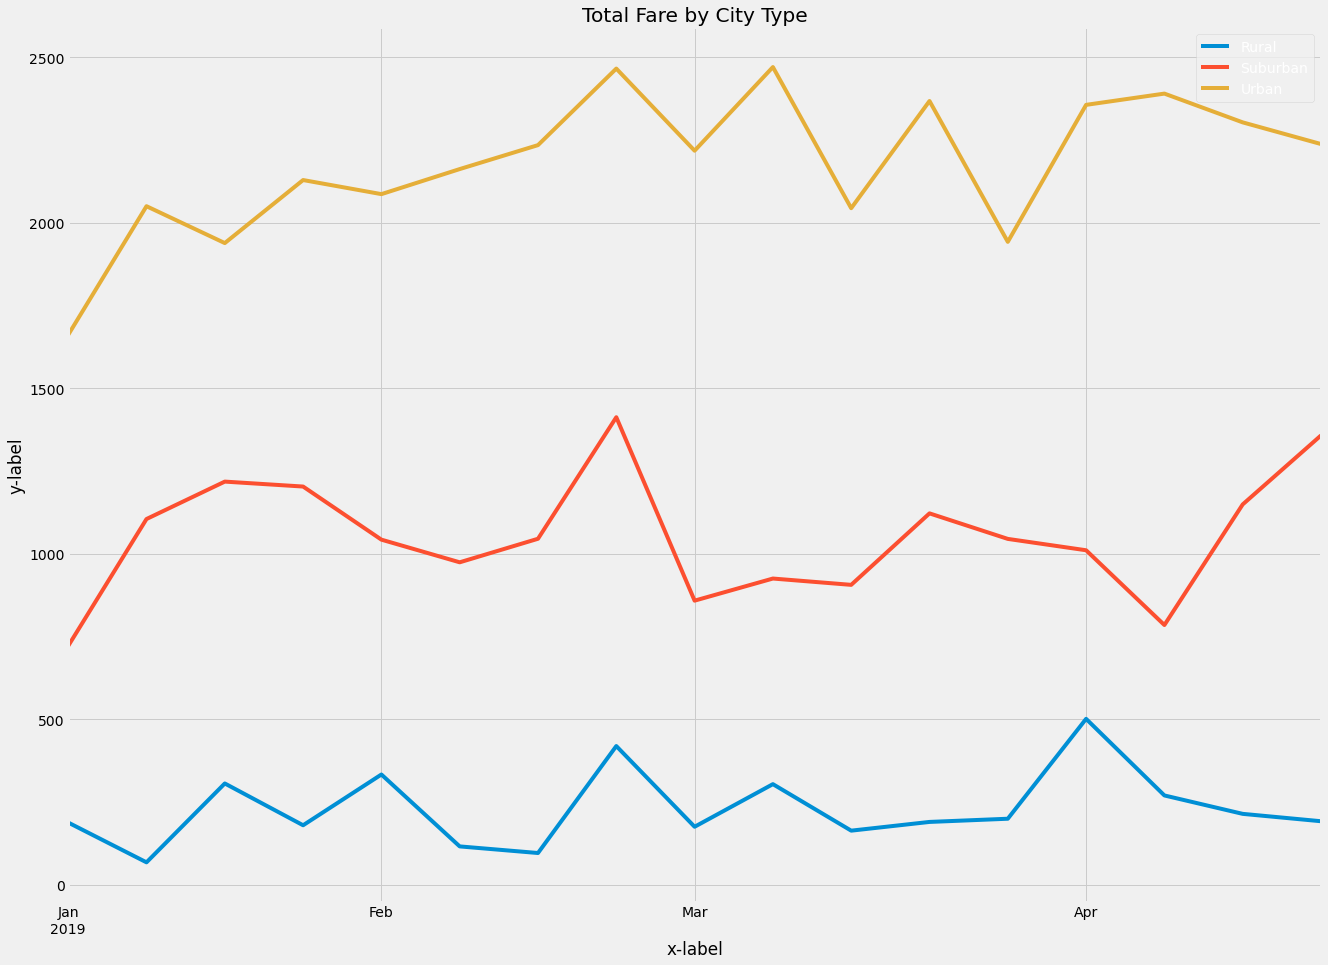

In [44]:
#8. Plot the dataframe Using the object-oriented interface, plot the new DataFrame using the df.plot() function. 

# Import the styles
from matplotlib import style
# Use the graph style dark_background
style.use('fivethirtyeight')


# Create the plot
#fig = plt.figure()
#ax = fig.add_subplot()
#ax = plt.axes()
#ax = plt.axes()
#ax.plot(x_axis = loc_pyber_pivottable_res.index, y_axis = loc_pyber_pivottable_res.Rural, #marker='D', color='g', linewidth=2, label='Boston')

loc_pyber_pivottable_res.plot(figsize=(20,15))
plt.ylabel("Fare($)")
plt.xlabel("Month")
plt.title("Total Fare by City Type")
labelplt = plt.title('Total Fare by City Type')
labelplt.set_color('black')
labely = plt.ylabel('y-label')
labely.set_color('black')
labelx = plt.xlabel('x-label')
labelx.set_color('black')
labelax = plt.subplot(111)
labelax.tick_params(axis= 'x', colors='black')
labelax.tick_params(axis= 'y', colors='black')
leg = plt.legend(framealpha = 0, loc = 'best')
for text in leg.get_texts():
    plt.setp(text, color = 'black')

# Save Figure
plt.savefig("analysis/Fig8.png")
plt.legend(loc = 'upper right')